In [1]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Reading pertinent csv files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [9]:
#Establishing DF from CSVs
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [11]:
#For city_data_df, Need to:
# 1) check for empty cells
# 2) make sure that driver counts are integers
# 3) find how many data points per city

# 1) check for null cells
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [12]:
# 2) Checking data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [13]:
# 3) determining data points by type...reveals ['Urban', 'Suburban', 'Rural']
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [16]:
urban_count = sum(city_data_df["type"] == "Urban") # 66 total
suburban_count = sum(city_data_df["type"] == "Suburban") # 36 total
rural_count = sum(city_data_df["type"] == "Rural") # 18 total

18

In [17]:
# For ride_data_df, Need to:
# 1) Get counts of rows with null values
# 2) make sure that fare and ride_id are numeric 

# 1) Getting null counts
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [18]:
# 2) Checking types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# For the visualization, we need:
# axes: x = Total number of rides (per city), y = Average Fares ($), need to calculate these
# size of each marker to correlate to the density of average number of drivers for each type of city
# breaking down DF into 3 DFs for each city type will simplify this process

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [22]:
# Need the number of riders per city, regrouping parent type df's by city and counting 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [24]:
# Need the average fare per city, regrouping parent type df's by city and calc mean
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [26]:
# Need the average number of drivers per city, regrouping parent type df's by city and counting
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

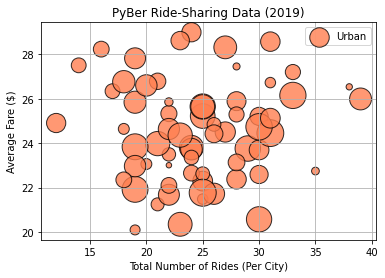

In [29]:
# Building scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            label="Urban", 
            c="coral",
            edgecolors='k',
            linewidths=1,
            alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

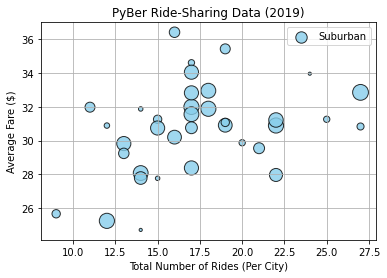

In [30]:
# Copying template for suburban cities plot
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label="Suburban", 
            c="skyblue",
            edgecolors='k',
            linewidths=1,
            alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

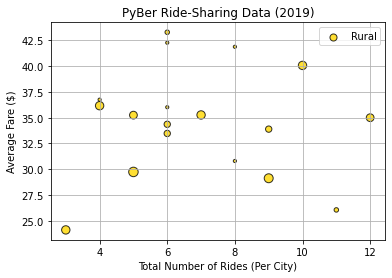

In [31]:
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            label="Rural", 
            c="gold",
            edgecolors='k',
            linewidths=1,
            alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

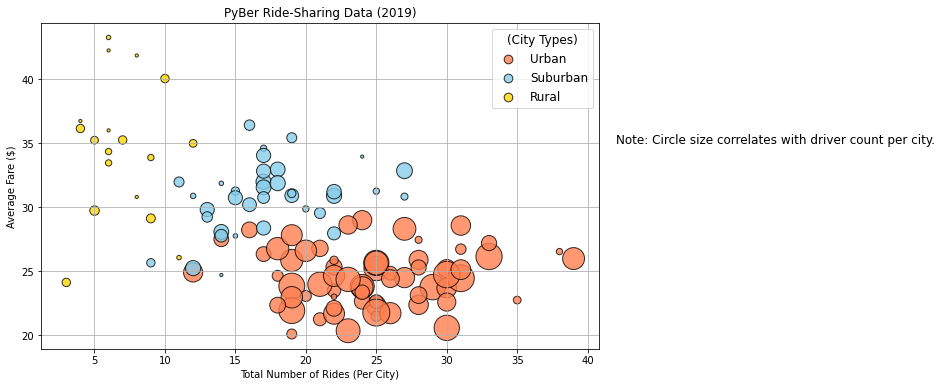

In [43]:
#Combining Plots 
plt.subplots(figsize=(10,6))
#Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            label="Urban", 
            c="coral",
            edgecolors='k',
            linewidths=1,
            alpha=0.8)
#Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            label="Suburban", 
            c="skyblue",
            edgecolors='k',
            linewidths=1,
            alpha=0.8)
#Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            label="Rural", 
            c="gold",
            edgecolors='k',
            linewidths=1,
            alpha=0.8)
#Plot Customization
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#plt.legend()

#Formatting an appropriate legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="(City Types)")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# making a note to explain the varying circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("Analysis/Fig1.png", dpi=300, bbox_inches='tight')
plt.show()

In [44]:
#Need some statistical breakdown...
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [45]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [46]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [47]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [48]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [49]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [50]:
# Getting the means for the types
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [51]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [52]:
suburban_ride_count.mode()

0    17
dtype: int64

In [53]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [54]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [55]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [56]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [57]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [58]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [60]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [61]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [63]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(f"Urban city drivers: Mean = {mean_urban_drivers:.2f}, Median = {median_urban_drivers:.2f}, Mode = {mode_urban_drivers}")

Urban city drivers: Mean = 36.68, Median = 37.00, Mode = ModeResult(mode=array([39]), count=array([86]))


In [64]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"Suburban city drivers: Mean = {mean_suburban_drivers:.2f}, Median = {median_suburban_drivers:.2f}, Mode = {mode_suburban_drivers}")

Suburban city drivers: Mean = 13.71, Median = 16.00, Mode = ModeResult(mode=array([20]), count=array([79]))


In [65]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f"Rural city drivers: Mean = {mean_rural_drivers:.2f}, Median = {median_rural_drivers:.2f}, Mode = {mode_rural_drivers}")

Rural city drivers: Mean = 4.30, Median = 4.00, Mode = ModeResult(mode=array([1]), count=array([32]))


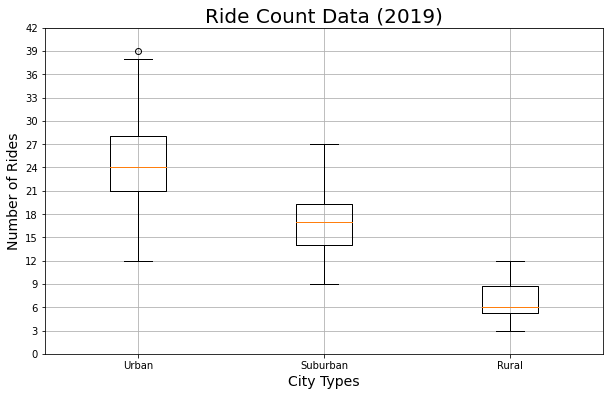

In [71]:
# Object-oriented approach to boxplot for Urban Driver Count
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("Analysis/Fig2.png", dpi=300, bbox_inches='tight')
plt.show()

In [72]:
#39 is an outlier from the plot, need to find that city! 
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


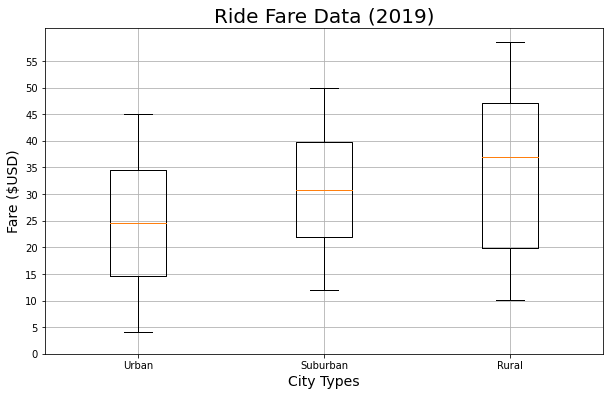

In [76]:
# Creating a box plot for all ride fare data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("Analysis/Fig3.png", dpi=300, bbox_inches='tight')
plt.show()


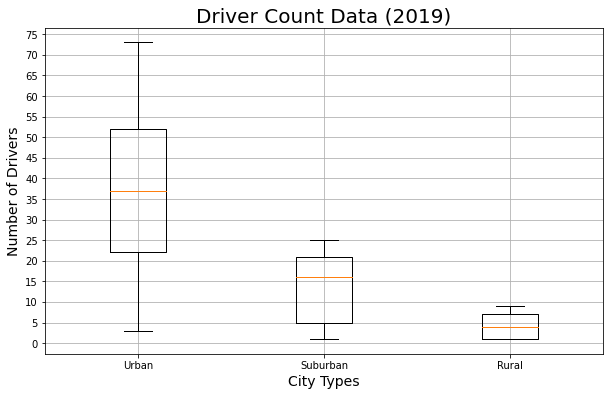

In [78]:
# Creating a box plot for all driver count data
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("Analysis/Fig4.png", dpi=300, bbox_inches='tight')
plt.show()

In [80]:
# Considering pie chart for alt. visualizations % Total Fares by City
# Need the following: 
# 1) Total fares per city type
# 2) Total fares overall
# 3) Calculate the percentage breakdowns

# 1) Sums of fare by type, go back to master DF
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

# 2) Overall fares
total_fares = pyber_data_df["fare"].sum()

# 3) Calc %'s
type_percents = 100 * sum_fares_by_type / total_fares

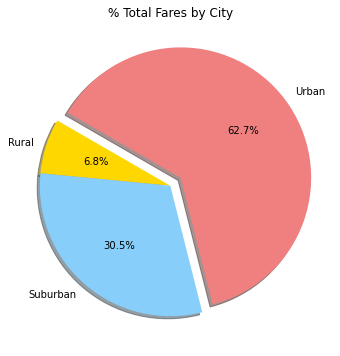

In [84]:
# Constructing pie chart for % Total Fares by City
import matplotlib as mpl

plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True,
       startangle=150)
plt.title("% Total Fares by City")
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig5.png", dpi=300, bbox_inches='tight')
plt.show()

In [85]:
# Creating Pie charter similarly, but for % Total Rides by City Types
# Need the following: 
# 1) total number of rides per type
# 2) Overall total rides
# 3) Calc percentages for each type

# Can call all of this in one line of code:
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [ ]:
# Constructing pie chart for % Total Rides by City Types
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True,
       startangle=150)
plt.title("% Total Rides by City Types")